Reference: https://mc-stan.org/docs/stan-users-guide/reparameterization.html

In [5]:
import stan
import numpy as np
import matplotlib.pyplot as plt
import nest_asyncio; nest_asyncio.apply()
import pandas as pd; pd.set_option("mode.chained_assignment", None)
from utils import select_columns, plot_ESS, plot_GR, plot_posterior

num_chains = 10
num_samples = 5000

In [20]:
funnel_centered = """
parameters {
  real y; 
  vector[9] x; 
}
model {
  y ~ normal(0, 3); 
  x ~ normal(0, exp(y/2)); 
}
"""

posterior_centered = stan.build(funnel_centered)
fit_centered = posterior_centered.sample(num_chains=num_chains, num_samples=num_samples)
df_centered = fit_centered.to_frame()
df_centered.to_csv("result/funnel_centered.csv")

Building...



Building: found in cache, done.Messages from stanc:
Sampling:   0%
Sampling:  10% (6000/60000)
Sampling:  20% (12000/60000)
Sampling:  30% (18000/60000)
Sampling:  40% (24000/60000)
Sampling:  50% (30000/60000)
Sampling:  60% (36000/60000)
Sampling:  70% (42000/60000)
Sampling:  80% (48000/60000)
Sampling:  90% (54000/60000)
Sampling: 100% (60000/60000)
Sampling: 100% (60000/60000), done.
Messages received during sampling:
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfro

In [4]:
funnel_noncentered = """
parameters {
  real y_hat;
  vector[9] x_hat;
}
transformed parameters {
  real y = 3.0 * y_hat;
  vector[9] x = exp(y/2) * x_hat;
}
model {
  y_hat ~ std_normal();
  x_hat ~ std_normal();
}
"""

posterior_noncentered = stan.build(funnel_noncentered)
fit_noncentered = posterior_noncentered.sample(num_chains=num_chains, num_samples=num_samples)
df_noncentered = fit_noncentered.to_frame()
df_noncentered.to_csv("result/funnel_noncentered.csv")

Building...

In file included from /home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/httpstan/include/stan/model/indexing.hpp:5,
                 from /home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:17,
                 from /home/sangho/.cache/httpstan/4.8.2/models/vffw3grw/model_vffw3grw.cpp:2:
/home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp: In function ‘void stan::model::assign(Mat1&&, const Mat2&, const char*, const stan::model::index_multi&, const stan::model::index_multi&)’:
/home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp:401:9: warning: typedef ‘using pair_type = struct std::pair<int, std::vector<int, stan::math::arena_allocator<int> > >’ locally defined but not used [-Wunused-local-typedefs]
  401 |   using pair_type = std::pair<int, arena_vec>;
      |         ^~~~~~~~~
/home/sangho/.cache/h


Building: 14.3s, done.Sampling:   0%
Sampling:  10% (6000/60000)
Sampling:  20% (12000/60000)
Sampling:  30% (18000/60000)
Sampling:  40% (24000/60000)
Sampling:  50% (30000/60000)
Sampling:  60% (36000/60000)
Sampling:  70% (42000/60000)
Sampling:  80% (48000/60000)
Sampling:  90% (54000/60000)
Sampling: 100% (60000/60000)
Sampling: 100% (60000/60000), done.
Messages received during sampling:
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would 

In [3]:
df_centered = pd.read_csv("result/funnel_centered.csv")
df_noncentered = pd.read_csv("result/funnel_noncentered.csv")
dfs = [df_centered, df_noncentered]
labels = ["centered", "noncentered"]

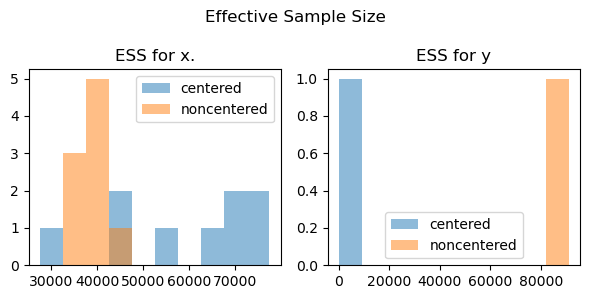

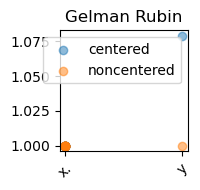

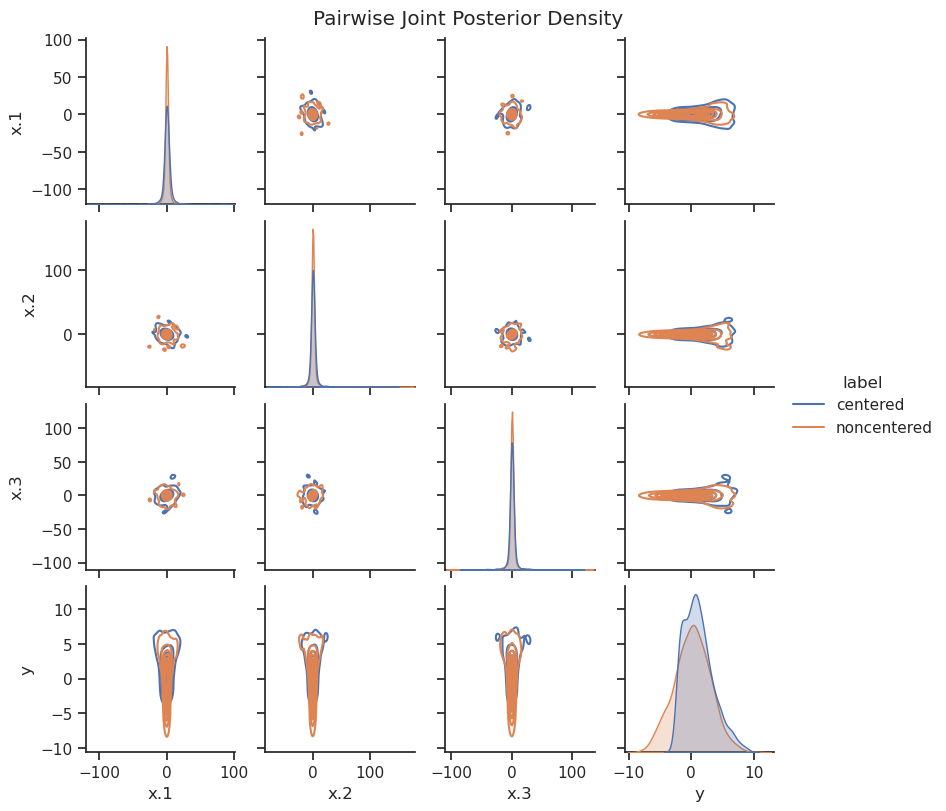

In [6]:
plot_ESS(dfs, labels, 
         params=["x.", "y"],
         num_chains=num_chains, num_samples=num_samples)

plot_GR(dfs, labels,
        params=["x.", "y"],
        num_chains=num_chains, num_samples=num_samples)

plot_posterior(dfs, labels,
               params=["x.1", "x.2", "x.3", "y"],
               num_subsamples=1000)